In [1]:
# Fill in your names using the format below and student ID number
group_id = "1"
team_member_1 = "van Happen, Colette, 2069244"
team_member_2 = "Spinnler, Olivier, 2007452"
team_member_3 = "de Wildt, Tom, 2068292"
team_member_4 = "Priem, Laurens, 1274328"
team_member_5 = "Delisse, Bram, 2065006"
team_member_6 = "Donaldson, Iona 2064159"

In [3]:
# Before submission, set this to True so that you can render and verify this notebook without retraining all the deep learning models.
# All models will be loaded from file instead.
stop_training = False

In [4]:
# Uncomment the following line to run in Google Colab
# This will link the notebook to your Google drive to store your models and cache the dataset.
# This will probably ask you to click on a link to get a verification code.
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [5]:
# Uncomment the following line to run in Google Colab to install OpenML
!pip install --quiet openml

You should consider upgrading via the 'c:\users\ionad\anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
# Uncomment the following to check whether you have access to a GPU in Google Colab
# See further instructions below.
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') 

[]

In [7]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [8]:
# Uncomment to use OpenML caching with your Google Drive. After longer periods of inactivity, your Colab VM may be recycled, 
# in which case the dataset will have to be downloaded again. To avoid this, use the code below to let OpenML cache the dataset 
# on your Google Drive.
# On your local machine, it will store data in a hidden folder '~/.openml'
#import os
#oml.config.cache_directory = os.path.expanduser('/content/drive/MyDrive/cache')

In [9]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(tensorflow_version) < version.parse("2.2.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.2 or later (e.g. 2.4)".format(tensorflow_version))
elif version.parse(tensorflow_version) < version.parse("2.4.0"):
    print("Tensorflow version is <2.4. This will likely work but we recommend updating to 2.4".format(tensorflow_version))
else:
    print("Looks good. You may continue :)")

Looks good. You may continue :)


# Assignment 3

Did you ever wonder how Google Maps can locate specific house numbers? We'll find out using imagery from Google Streetview. 

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * E.g. '/content/drive/My Drive/Assignment3' if you don't change it

In [65]:
script_path = os.path.realpath(os.path.dirname(__name__))
base_dir = script_path + '\\models'

In [66]:
base_dir

'C:\\Users\\ionad\\Documents\\JADS\\Semester_1\\Datamining\\Our assignment\\dm-3\\models'

In [62]:
script_path = os.path.realpath(os.path.dirname(__name__))

In [64]:
script_path + '\\models'

'C:\\Users\\ionad\\Documents\\JADS\\Semester_1\\Datamining\\Our assignment\\dm-3\\models'

In [59]:
os.chdir(script_path)
script_path.append("/models")

AttributeError: 'str' object has no attribute 'append'

In [37]:
current_location = os.getcwd()

In [31]:
os.getcwd()

'C:\\Users\\ionad\\Documents\\JADS\\Semester_1\\Datamining\\Our assignment\\dm-3'

In [ ]:
os.join

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* You should submit your notebook, but also a PDF and a link to all stored models. One way to do this is to upload them to GitHub.
* Ideally, your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to check that all the results are included in the notebook. Also upload a PDF (e.g. by printing to PDF) with all results as a backup.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit. [Read more about this dataset here](https://storage.googleapis.com/pub-tools-public-publication-data/pdf/37648.pdf).

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. 

Also note that this dataset is about 1Gb large, and parsing it will take even more space in memory. You may need to switch to a high-RAM environment (only in Colab pro). As a workaround, we've hosted the pre-loaded OpenML version of this dataset and provided code to download it below - uncomment it if you prefer to use this.

In [11]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [21]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

In [22]:
# Backup solution to download the dataset file from.
# File: "https://drive.google.com/file/d/1zZRRe3ffmuAf1x4yZmYwG_rLiuggep2A/view?usp=sharing"
# Uncomment the text below to use this alternative

#import pickle
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#gdrive = GoogleDrive(gauth)

#downloaded = gdrive.CreateFile({'id':"1zZRRe3ffmuAf1x4yZmYwG_rLiuggep2A"})
#downloaded.GetContentFile('dataset.pkl.py3')

#with open("dataset.pkl.py3", "rb") as fh:
#    data, categorical, attribute_names = pickle.load(fh)
#d = data.to_numpy(dtype='int')
#X, y = d[:,:-1], d[:,-1]-1

Reshape, sample and split the data

In [23]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [24]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

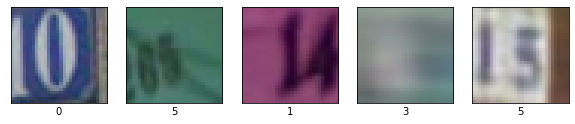

In [25]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [26]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
  """ Prints text in red. Just for fun.
  """
  if verbose>0:
    print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
  """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
  function following the Keras API. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  try:
    print(os.path.join(base_dir, name+extension))
    model = load_model(os.path.join(base_dir, name+extension))
  except OSError:
    shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
    return False
  return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
  """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
  return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
  """ Trains and evaluates the given model on the predefined train and test splits,
  stores the trained model and learning curves. Also prints out a summary of the 
  model and plots the learning curves.
  Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
  """
  model = model_builder(**kwargs)
  if not model:
    shout("No model is returned by the model_builder")
    return
  if not hasattr(model, 'fit'):
    shout("Model is not built correctly")
    return
  learning_curves = {}
  if train and not stop_training: # Train anew
    shout("Training the model", verbose)
    if generator:
      generator, X_val, y_val = data
      history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                          steps_per_epoch=steps_per_epoch, verbose=1, 
                          validation_data=(X_val, y_val))
      learning_curves = history.history
    else:
      X_train, X_val, y_train, y_val = data
      history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                          verbose=1, validation_data=(X_val, y_val))
      learning_curves = history.history
    shout("Saving to file", verbose)
    save_model_to_file(model, base_dir, name)
    with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
      pickle.dump(learning_curves, file_pi)
    shout("Model stored in "+base_dir, verbose)
  else: # Load from file
    shout("Loading model from file", verbose)
    model = load_model_from_file(base_dir, name)
    if not model:
      shout("Model not found")
      return
    learning_curves = None
    try:
      learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
    except FileNotFoundError:
      shout("Learning curves not found")
      return
    shout("Success!", verbose)
  # Report
  print(model.summary())
  lc = pd.DataFrame(learning_curves)
  lc.plot(lw=2,style=['b:','r:','b-','r-']);
  plt.xlabel('epochs');
  print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

In [27]:
def build_model_1_1():
  pass
run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)
answer_q_1_1 = """
               Your answer 
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

No model is returned by the model_builder
Answer is 44 characters long


### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [28]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [29]:
# Replace with the preprocessed data
preprocessed_split = X_train, X_val, y_train, y_val

# Adjusted model
def build_model_1_2():
  pass

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=True, epochs=3, batch_size=32)
answer_q_1_2 = """
               Your answer 
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

No model is returned by the model_builder
Answer is 44 characters long


### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

In [ ]:
def build_model_1_3():
  pass
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=True, epochs=3, batch_size=32)
answer_q_1_3 = """
               Your answer 
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
C:\Users\ionad\Documents\JADS\Semester_1\Datamining\Our assignment\dm-3\models\model_2_1.h5
Success!
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_49 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_50 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 16, 16, 32)        0     

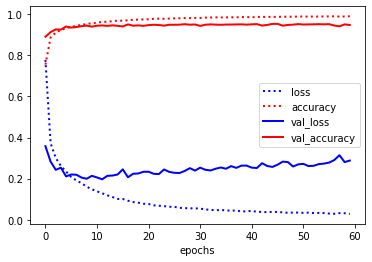

In [78]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers

def build_model_2_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1), kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=30, batch_size=64)

In [83]:
answer_q_2_1 = """
               The network consists of three convolutional blocks with an increasing number of nodes. 
               An descending pyramid structure was also considered but gave poorer performance. A larger number of nodes 
               was also considered but required much more time for training, this was the best balance
               of performance and time required.
               MaxPooling is used to allow information to spread through the rest of the image.
               The network is clearly overfitting already after about 5 epochs, early stopping would have been useful.
               L1, L2 regularisation and increased/ increasing dropout were all considered to reduce the overfitting 
               but produced poorer average validation accuracy.
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

Answer is 790 characters long


### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
C:\Users\ionad\Documents\JADS\Semester_1\Datamining\Our assignment\dm-3\models\model_2_2.h5
Success!
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_77 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_78 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 16, 16, 32)        0    

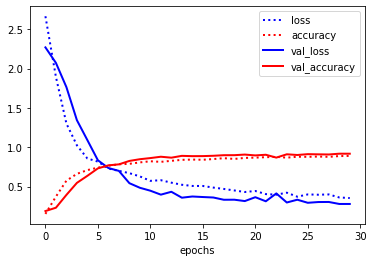

In [70]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    width_shift_range=0.1, # moving to side (changed from 0.1 to 0.05)
    height_shift_range=0,
    rotation_range=0,
    zoom_range=0.05,
    shear_range=0.1,
    fill_mode='nearest'
    )

it_train = train_datagen.flow(X_train, y_train, batch_size=64)
generator_split = it_train, X_val, y_val

run_evaluation("model_2_2", build_model_2_1, generator_split, base_dir, 
               train=False, generator=True,epochs=30, batch_size=64)

In [85]:
answer_q_2_2 = """
               After running model 1 we checked the incorrectly predicted numbers using the misclassified visualisations below.
               Many of the misclassifications came from looking at different angles, rotated numbers, numbers off to the side or above.
               Based on this, variables were chosen that would generate this type of data. Other options were also trialled and 
               it was noted that changing the brightness meant that the performance would quickly get stuck in a local minima, perhaps
               due to the greyscaling.
               While the model did not improve in performance the overfitting has been removed meaning that hopefully this model is more generalisable.
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

Answer is 735 characters long


## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

C:\Users\ionad\Documents\JADS\Semester_1\Datamining\Our assignment\dm-3\models\model_2_2.h5
Test accuracy:  0.9182697149763319


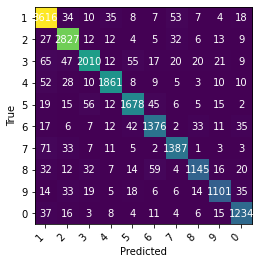

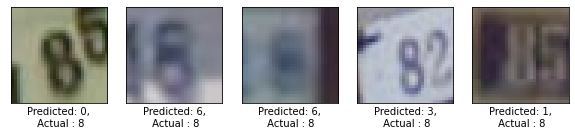

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(y_pred, y_test):
    cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
    fig, ax = plt.subplots()
    im = ax.imshow(cm)
    ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
    classes = [1,2,3,4,5,6,7,8,9,0]
    ax.set_xticklabels(list(classes), rotation=45, ha="right")
    ax.set_yticklabels(list(classes))
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    for i in range(100):
        ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

def plot_misclassifications(y_pred, y_test, actual_number):
    misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]
    plot_samples = [i for i in misclassified_samples if ((np.argmax(y_test[i])+1)%10) == actual_number]
    # Visualize the (first five) misclassifications, together with the predicted and actual class
    fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
    for nr, i in enumerate(plot_samples[:5]):
        axes[nr].imshow(X_test[i])
        axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % ((np.argmax(y_pred[i])+1)%10,(np.argmax(y_test[i])+1)%10))
        axes[nr].set_xticks(()), axes[nr].set_yticks(())
    
    plt.show();

model = load_model_from_file(base_dir, 'model_2_2')
X_test_processed = rgb2gray(X_test)
y_pred = model.predict(X_test_processed)
test_accuracy_3_1 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print("Test accuracy: ", test_accuracy_3_1)
plot_confusion_matrix(y_pred, y_test)
plot_misclassifications(y_pred, y_test, 8)
answer_q_3_1 = """
               Your answer 
               """

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

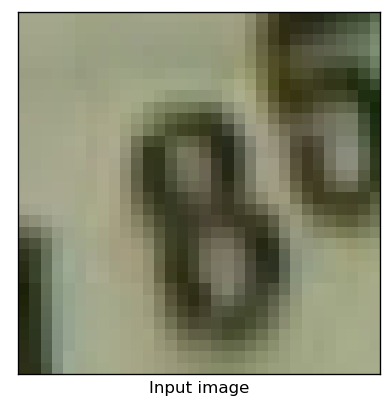

In [82]:
def plot_activations(layer_index, activations):
    images_per_row = 16

    layer_names = []
    for layer in model.layers[:len(model.layers)]:
        layer_names.append(layer.name)
        
    start = layer_index
    end = layer_index+1
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()
    
index = 0
image = X_test[index]
img_tensor = X_test_processed[index]
img_tensor = np.expand_dims(img_tensor, axis=0) 

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:len(model.layers)]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

plt.rcParams['figure.dpi'] = 120
first_layer_activation = activations[0]

f, (ax1) = plt.subplots(1, 1, sharey=True)
ax1.imshow(image)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('Input image')


answer_q_3_2 = """
               Your answer 
               """

<ipython-input-73-9c916592ece7>:30: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


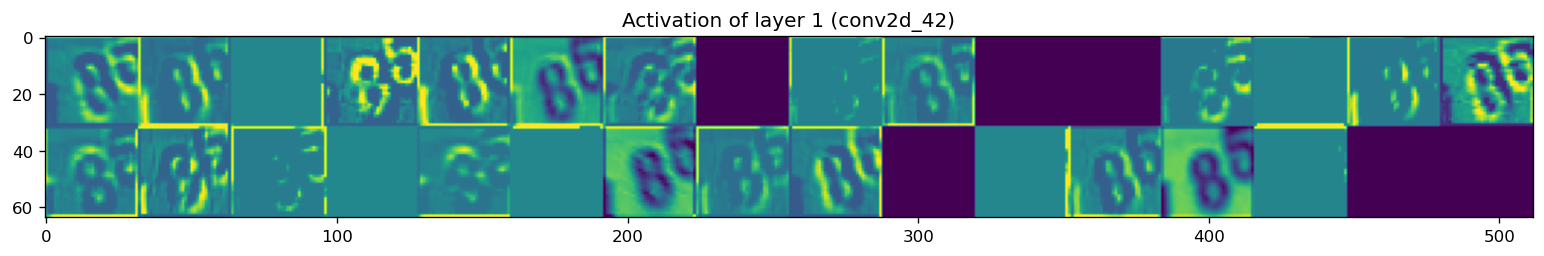

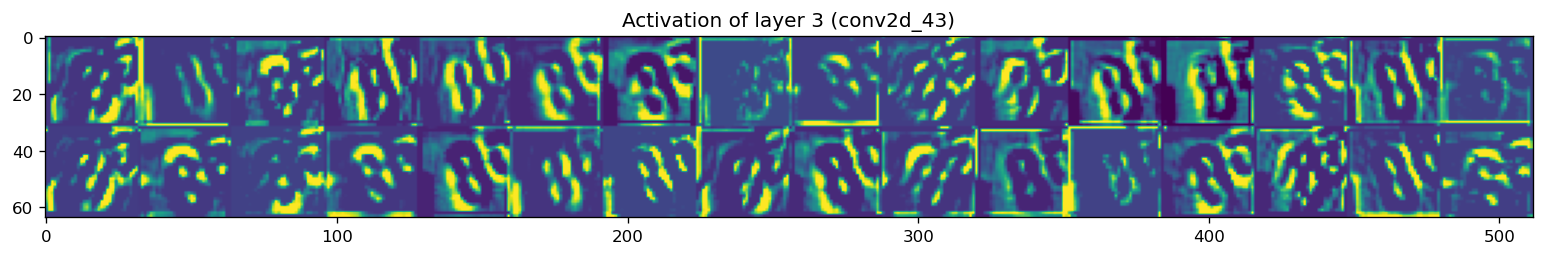

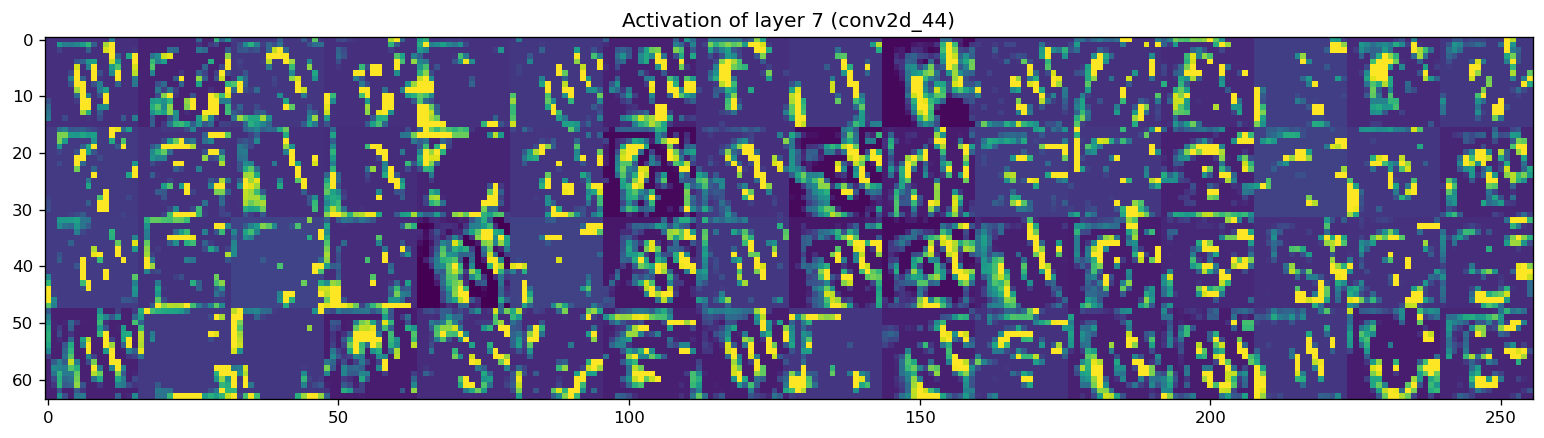

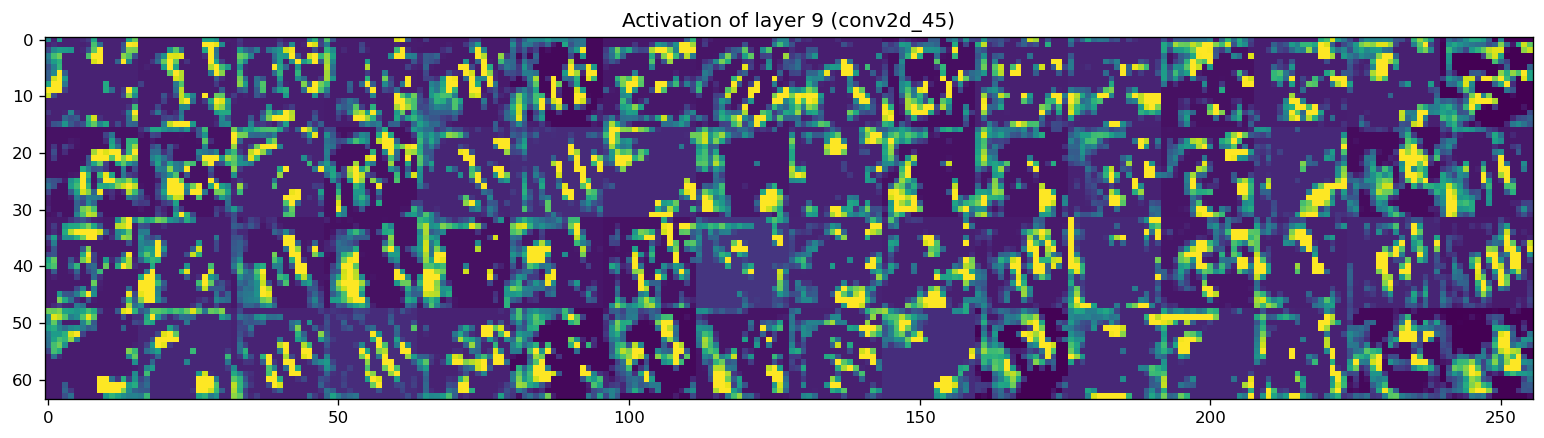

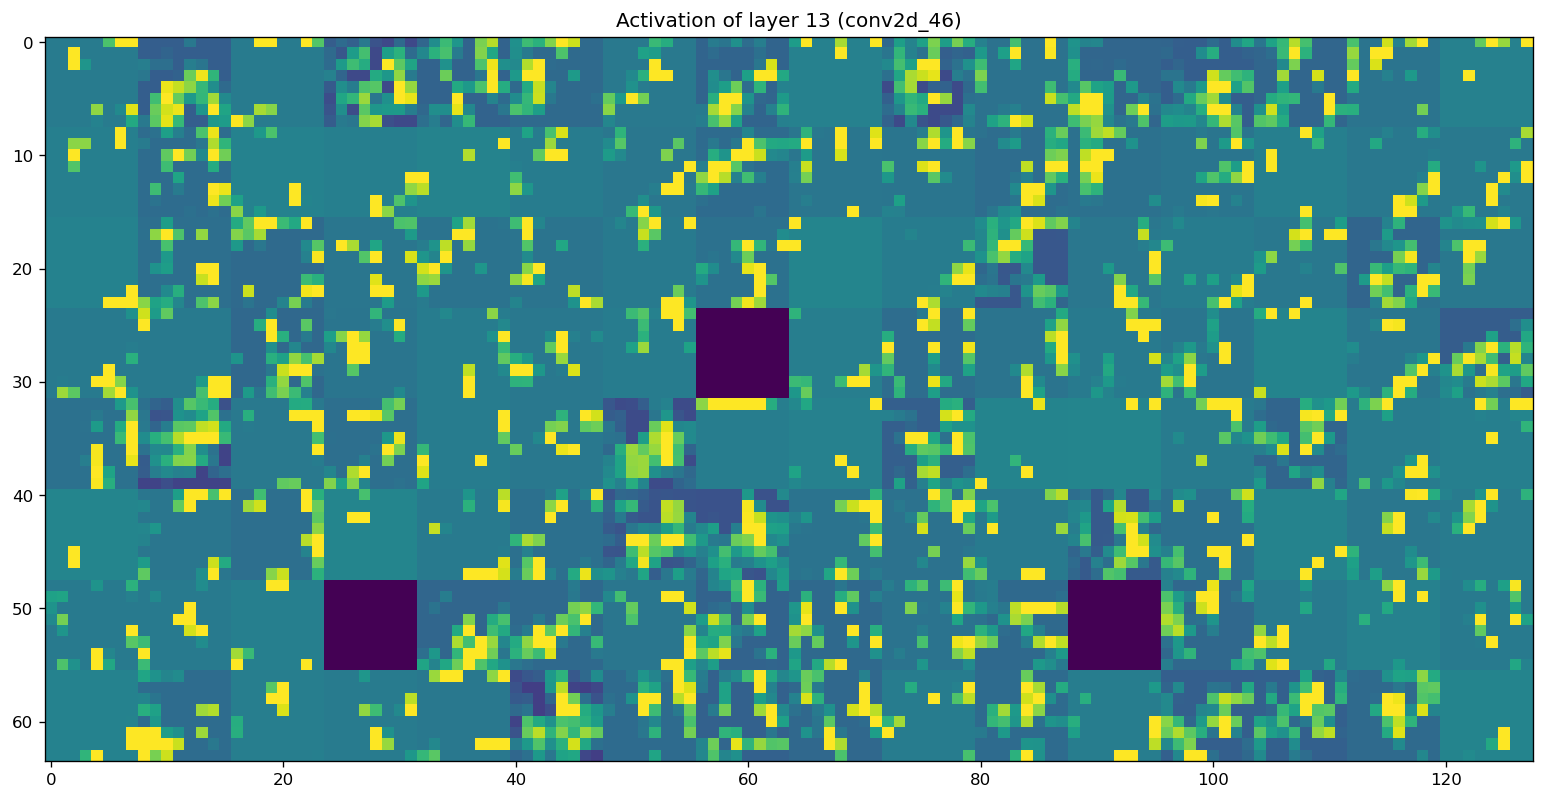

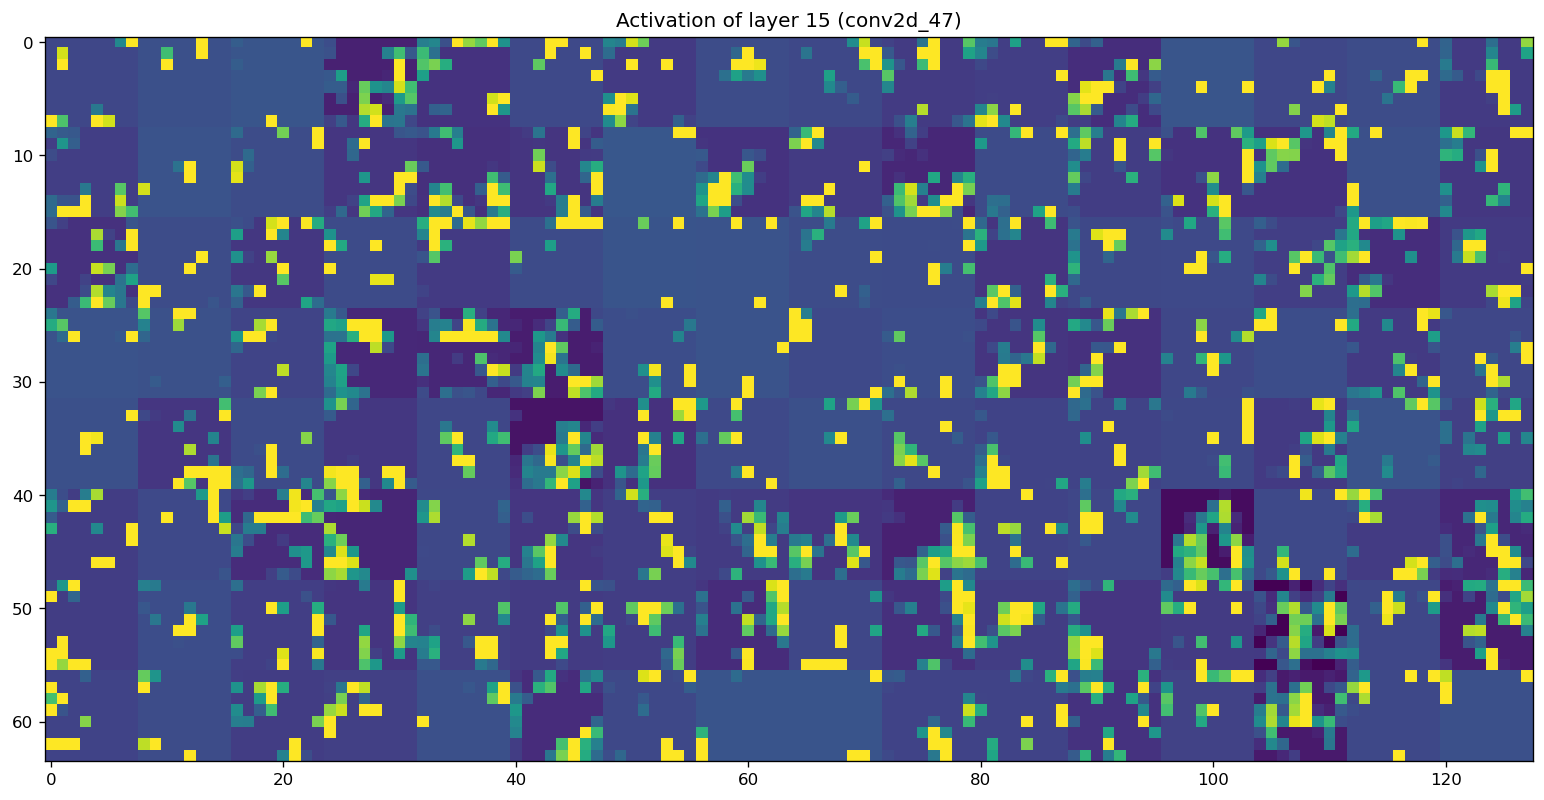

In [74]:
plot_activations(0, activations);
plot_activations(2, activations);
plot_activations(6, activations);
plot_activations(8, activations);
plot_activations(12, activations);
plot_activations(14, activations);

### Question 3.3: Visualizing the learned embeddings with tSNE (4 points)

Extract the learned embeddings of the images from X_train using your `model_2_2` and plot them on a 2D map using [tSNE](https://lvdmaaten.github.io/tsne/) as the dimensionality reduction technique.

- Implement a function `create_embeddings` to extract the n-sized embeddings of the training set based on the  Convolutional part of `model_2_2` (e.g VGG16 generates 512-sized embeddings)
- Implement a function `compute_tsne` that applies scikit-learn's implementation of [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to reduce the size of the embeddings from n to 2 (e.g for VGG16 this will mean `original_array` of  size (num_images, 512) compressed to a reduced array of size (num_images, 2))
- Implement a function `plot_tsne` that plots the 2D vector on a map highlighting the formed clusters, and color-coded by the true binary labels. Please note that this may take a while to compute the tSNE embeddings.
- Interpret the results from the map in `answer_q_2_3`

In [29]:
X_attempt= X_train[0:2000]

In [ ]:
from sklearn.manifold import TSNE
from tensorflow.keras.models import Sequential,Model

def create_embeddings(model_file):
    """ Returns the image embeddings of X_train learned in the given model
    """
    limited_model=Model(inputs=model.layers[0].input,outputs=model.layers[-5].output)
    embeddings = limited_model(X_attempt)
    return embeddings

def compute_tsne(original_array):
    """ Returns the 2D embeddings of original_array created by TSNE
    """
    n_components = 2
    tsne = TSNE(n_components, verbose=1)
    tsne_result = tsne.fit_transform(original_array)
    tsne_result.shape
    # (1000, 2)
    # Two dimensions for each of our images
    return tsne_result

model = load_model_from_file(base_dir, 'model_2_2')
#X_train = rgb2gray(X_train)
# n-sized embeddings extracted from X_train and reduced to 2-sized embeddings
dn_embs = create_embeddings("model_2_2")
d2_embs = compute_tsne(dn_embs)

Answer is 44 characters long


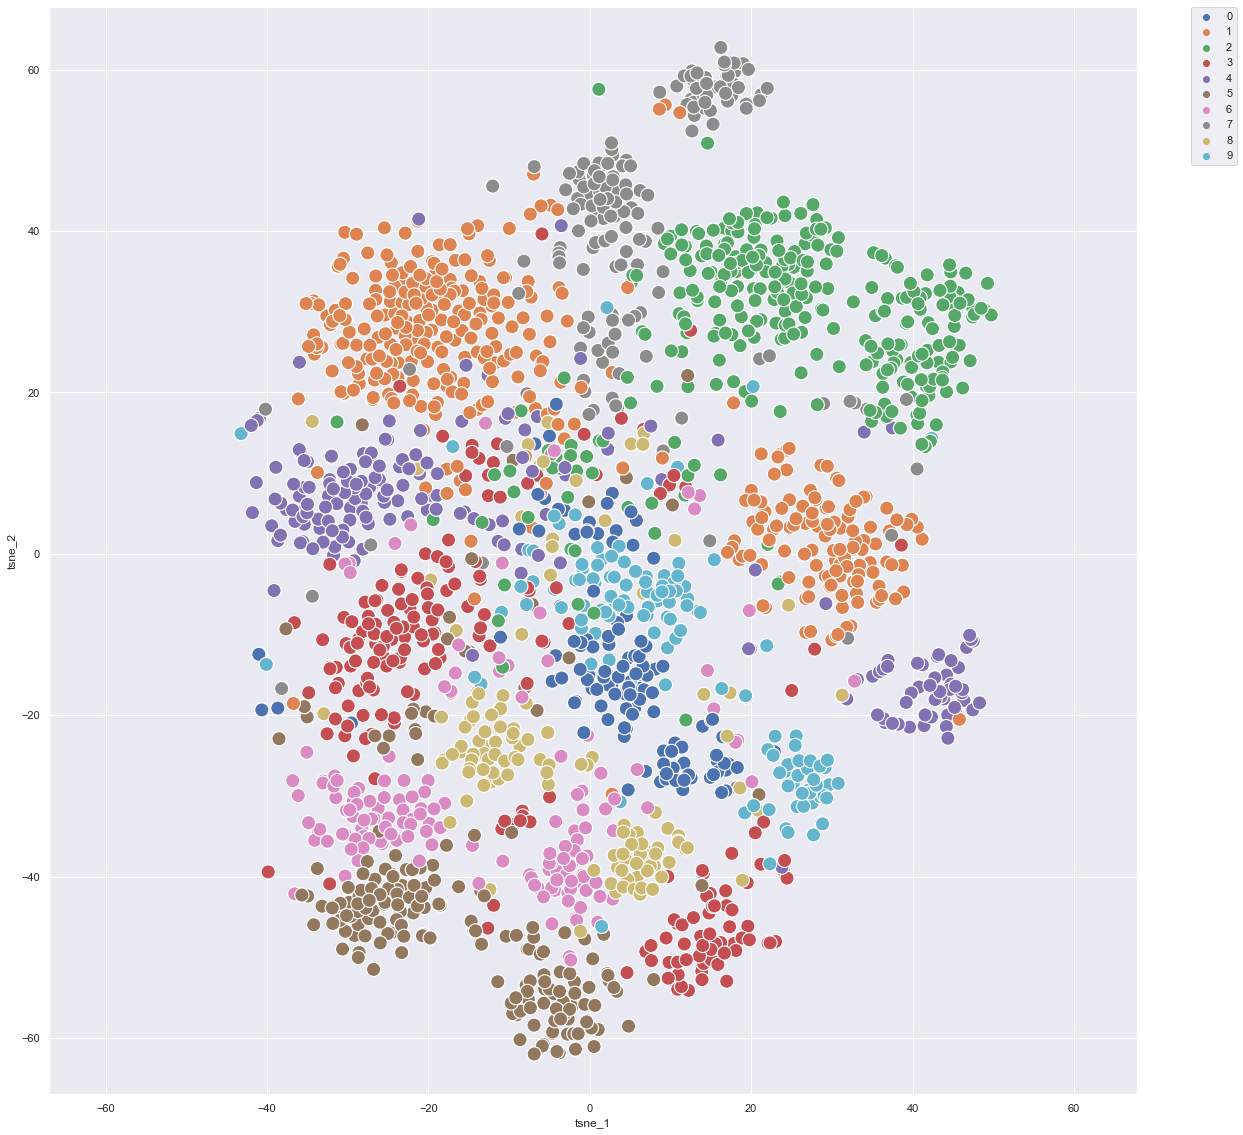

In [40]:
import seaborn as sns

def plot_tsne(tsne_embeds, labels):
    # Plot the result of our TSNE with the label color coded
    # A lot of the stuff here is about making the plot look pretty and not TSNE
    sns.set(rc={'figure.figsize':(20,20)})
    labels = [((np.argmax(i)+1)%10) for i in labels]
    tsne_result_df = pd.DataFrame({'tsne_1': tsne_embeds[:,0], 'tsne_2': tsne_embeds[:,1], 'label': labels})
    fig, ax = plt.subplots(1)
    sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=200, palette=sns.color_palette())
    lim = (tsne_embeds.min()-5, tsne_embeds.max()+5)
    #sns.set(rc={"figure.figsize":(200, 5)}) 
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plot_tsne(d2_embs, y_train[0:20000])


answer_q_2_3 = """
               Your answer 
               """
print("Answer is {} characters long".format(len(answer_q_2_3)))

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base.
- You can also add any kind of regularization.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

In [ ]:
def build_model_4_1():
  pass
run_evaluation("model_4_1", build_model_4_1, preprocessed_split, base_dir, 
               train=True, epochs=3, batch_size=32)
answer_q_4_1 = """
               Your answer 
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Optimizing transfer (5 points)

Perform the same transfer learning as in `Question 4.1`, but try to improve the performance.

- Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Consider other models to transfer from. For a comparison between different architectures, see [this link](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d), or choose one of the available architectures from [Keras Applications](https://keras.io/api/applications/). 
- Keep in mind that bigger models don't always perform better, some don't work on small images. Also try to use models that do
not take more than 100MB of storage.
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_2'.


In [ ]:
# Load pre-trained model, can be other than VGG16
conv_base = None

def build_model_4_2():
    pass

run_evaluation("model_4_2", build_model_4_2, augmented_split, base_dir, 
               train=True, generator=True, epochs=3, batch_size=None)

answer_q_4_2 = """
               Your answer 
               """

print("Answer is {} characters long".format(len(answer_q_3_2)))